In [6]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
#notebook # for interactive 3D plots
%matplotlib inline 
import cv2
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

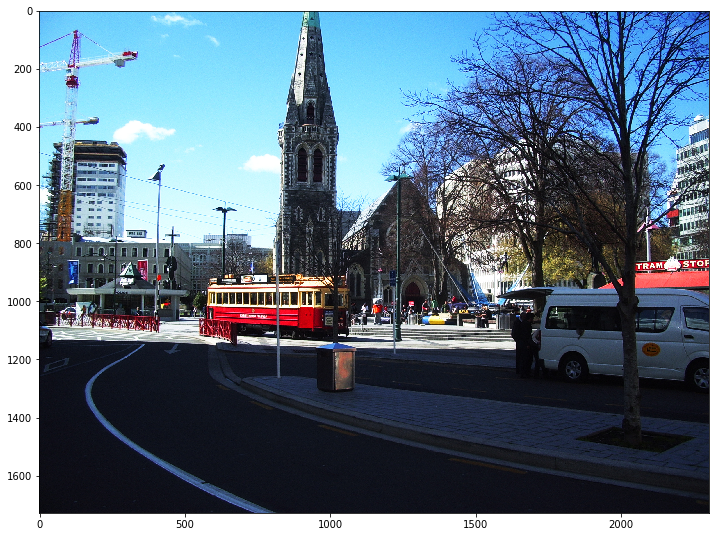

In [7]:
img = cv2.imread('NZ.jpg') # BGR
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
fig = plt.figure(figsize=(12, 10))
plt.imshow(img[:,:,::-1])
plt.show()

Number of points sampled: 7963


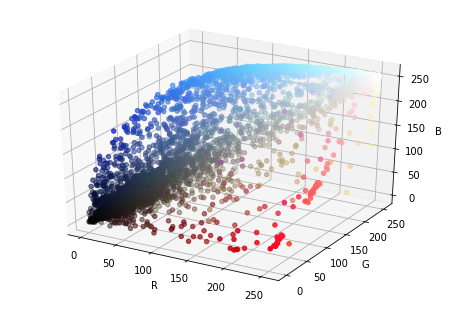

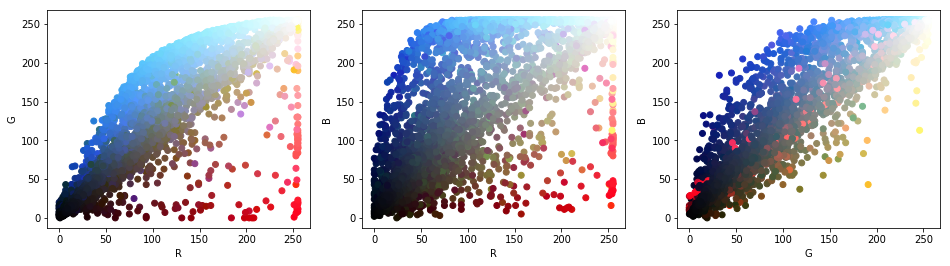

KMeans 	 k = 8


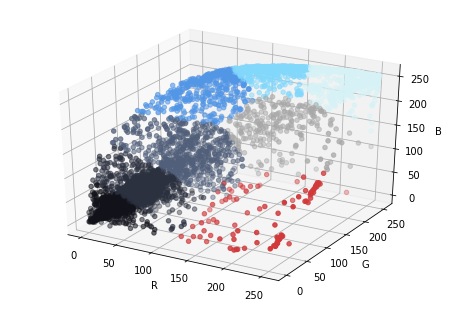

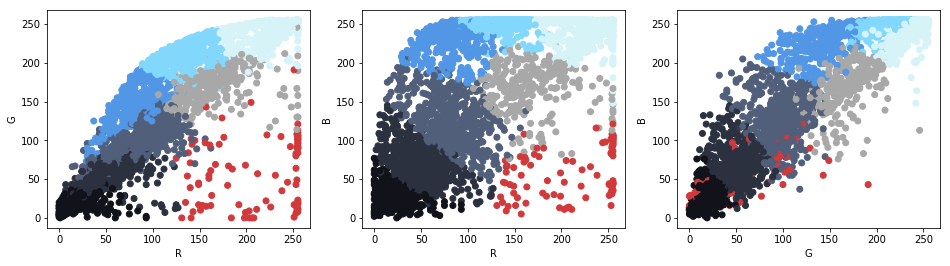

In [8]:
def plot_cart(color_space, color=None):
    '''
    description: plot color space graphs
    args:
        rgb (ndarray): [[r_1, g_1, b_1], [r_2, g_2, b_2], ... , [r_n, g_n, b_n]]
    '''
    if color is None:
        color = color_space
    r = color_space[:, 0]
    g = color_space[:, 1]
    b = color_space[:, 2]

    fig = plt.figure()#figsize=(12, 10))
    ax = Axes3D(fig)

    ax.scatter(r, g ,b, c=color/255)
    ax.set_xlabel('R')
    ax.set_ylabel('G')
    ax.set_zlabel('B')
    plt.show()

    f, ax = plt.subplots(1, 3, figsize=(16,4))
    ax[0].scatter(r, g, c=color/255,marker='o')
    ax[0].set_xlabel('R')
    ax[0].set_ylabel('G')

    ax[1].scatter(r, b, c=color/255,marker='o')
    ax[1].set_xlabel('R')
    ax[1].set_ylabel('B')

    ax[2].scatter(g, b, c=color/255,marker='o')
    ax[2].set_xlabel('G')
    ax[2].set_ylabel('B')
    plt.show()
    
def kmean_color(color_space, k):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(color_space)
    centroids = kmeans.cluster_centers_
    labels = kmeans.labels_
    color_space_assigned = kmeans.predict(color_space)
    cluster_colors = np.array([[0,0,0]]* len(color_space_assigned), dtype=np.uint8)
    
    for i, label in enumerate(color_space_assigned):
        cluster_colors[i] = centroids[label]
    print('KMeans \t k = {}'.format(k))
    
    
    return cluster_colors

flat_bgr = img.reshape(img.shape[0] * img.shape[1], 3) # make RGB values into a flat array

sample_rate = 500
sample_bgr = np.array([flat_bgr[i] for i in range(0, len(flat_bgr), sample_rate)])       
sample_rgb = sample_bgr[:, ::-1]
print('Number of points sampled:', len(sample_bgr))
plot_cart(sample_rgb)
cluster_rgb = kmean_color(sample_rgb,8)
plot_cart(sample_rgb, cluster_rgb)
    

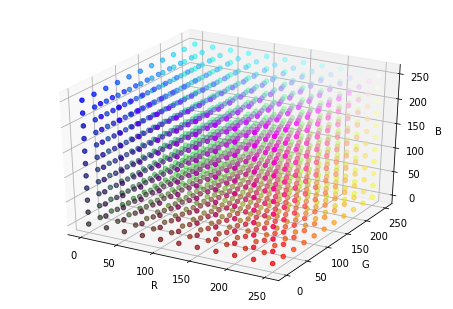

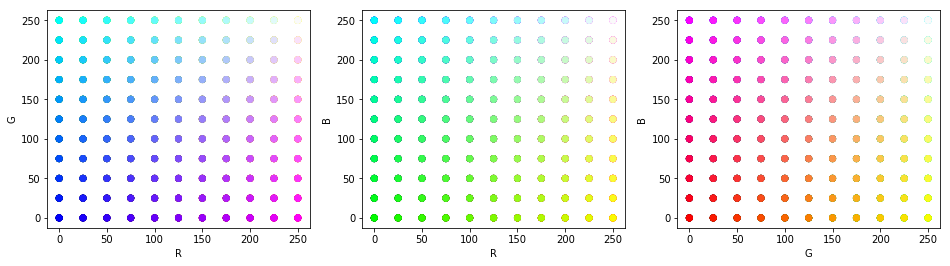

KMeans 	 k = 8


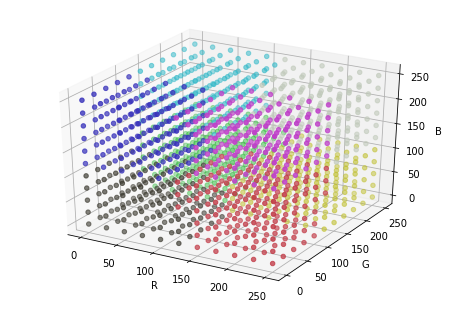

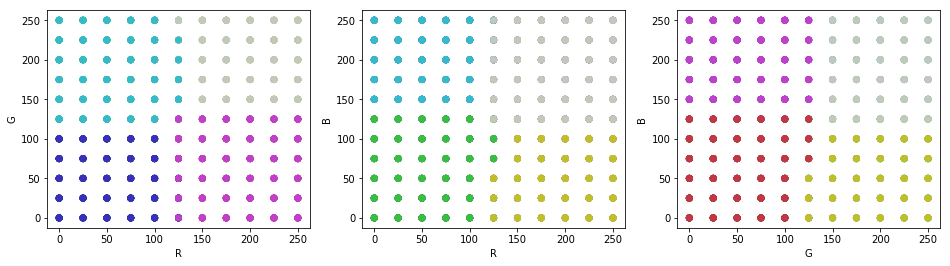

In [9]:
step = 25
rgb_uniform = np.array([[0,0,0]]* (255//step + 1)**3)

for i, r in enumerate(range(0,255, step)):
    for j, g in enumerate(range(0, 255, step)):
        for k, b in enumerate(range(0, 255, step)):
            rgb_uniform[i * (255//step + 1)**2 + 1 + (255//step + 1) * j + k - 1] = np.array([r,g,b])

plot_cart(rgb_uniform)
uniform_cluster = kmean_color(rgb_uniform, 8)
plot_cart(rgb_uniform, uniform_cluster)

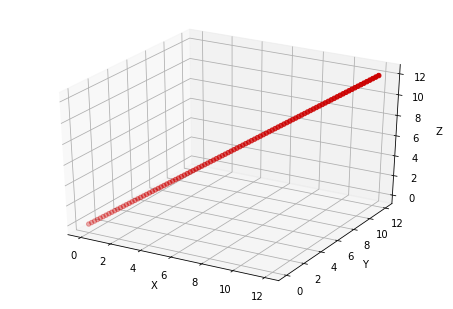

In [10]:
##### How to plot a 3D graph
x = np.linspace(0,12,100)
y = np.linspace(0,12,100)
z = np.linspace(0,12,100)

fig = plt.figure()
ax = Axes3D(fig)
rgb=np.array([[0.8,0,0]]*len(x))
# print(rgb)

ax.scatter(x, y, z, c=rgb)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

In [8]:
x = [[]] * 2
print(x)
y = [1,0,1,1,0,0,0,]
for i in y:
    x[i].append(i)
    print(x)


[[], []]
[[1], [1]]
[[1, 0], [1, 0]]
[[1, 0, 1], [1, 0, 1]]
[[1, 0, 1, 1], [1, 0, 1, 1]]
[[1, 0, 1, 1, 0], [1, 0, 1, 1, 0]]
[[1, 0, 1, 1, 0, 0], [1, 0, 1, 1, 0, 0]]
[[1, 0, 1, 1, 0, 0, 0], [1, 0, 1, 1, 0, 0, 0]]


In [9]:
x = [[],[]]
print(x)
y = [1,0,1,1,0,0,0,]
for i in y:
    x[i].append(i)
    print(x)

[[], []]
[[], [1]]
[[0], [1]]
[[0], [1, 1]]
[[0], [1, 1, 1]]
[[0, 0], [1, 1, 1]]
[[0, 0, 0], [1, 1, 1]]
[[0, 0, 0, 0], [1, 1, 1]]


In [10]:
x = []
for i in range(2):
    x.append([])
print(x)
y = [1,0,1,1,0,0,0,]
for i in y:
    x[i].append(i)
    print(x)
    

[[], []]
[[], [1]]
[[0], [1]]
[[0], [1, 1]]
[[0], [1, 1, 1]]
[[0, 0], [1, 1, 1]]
[[0, 0, 0], [1, 1, 1]]
[[0, 0, 0, 0], [1, 1, 1]]


In [24]:
x = []
x = []
for i in range(2):
    x.append([])
print(x)
y = [1,0,1,1,0,0,0,]
for i in y:
    x[i].append(i)
    print(x)

[[], []]
[[], [1]]
[[0], [1]]
[[0], [1, 1]]
[[0], [1, 1, 1]]
[[0, 0], [1, 1, 1]]
[[0, 0, 0], [1, 1, 1]]
[[0, 0, 0, 0], [1, 1, 1]]


[[1 2 3]
 [1 2 3]]
